In [3]:
#pandas is used for data analysis and matplotlib for visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#importing data
data=pd.read_csv("D:\Datasets\Sample Superstore\SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#changing the datatype from string to category
data[["Ship Mode","Segment","Country","City","State","Postal Code","Region","Category","Sub-Category"]]=data[["Ship Mode","Segment","Country","City","State","Postal Code","Region","Category","Sub-Category"]].astype("category")

In [6]:
#mapping cities with states, postal code and region
mapping=data[["City","State","Postal Code","Region"]]
mapping=mapping.drop_duplicates()
rows=mapping.shape[0]
print("Number of combinations of (City, State, Postal Code, Region) is: %d"%rows)
mapping.index=range(rows)
mapping.head(10)

Number of combinations of (City, State, Postal Code, Region) is: 632


,City,State,Postal Code,Region
0,Henderson,Kentucky,42420,South
1,Los Angeles,California,90036,West
2,Fort Lauderdale,Florida,33311,South
3,Los Angeles,California,90032,West
4,Concord,North Carolina,28027,South
5,Seattle,Washington,98103,West
6,Fort Worth,Texas,76106,Central
7,Madison,Wisconsin,53711,Central
8,West Jordan,Utah,84084,West
9,San Francisco,California,94109,West


In [18]:
#for each column values, finding mean profit
queries1=[]
names=["Ship Mode","Segment","Country","City","State","Region","Category","Sub-Category"]
n=len(names)
for x in names:
    queries1.append(data.groupby([x])["Profit"].mean())

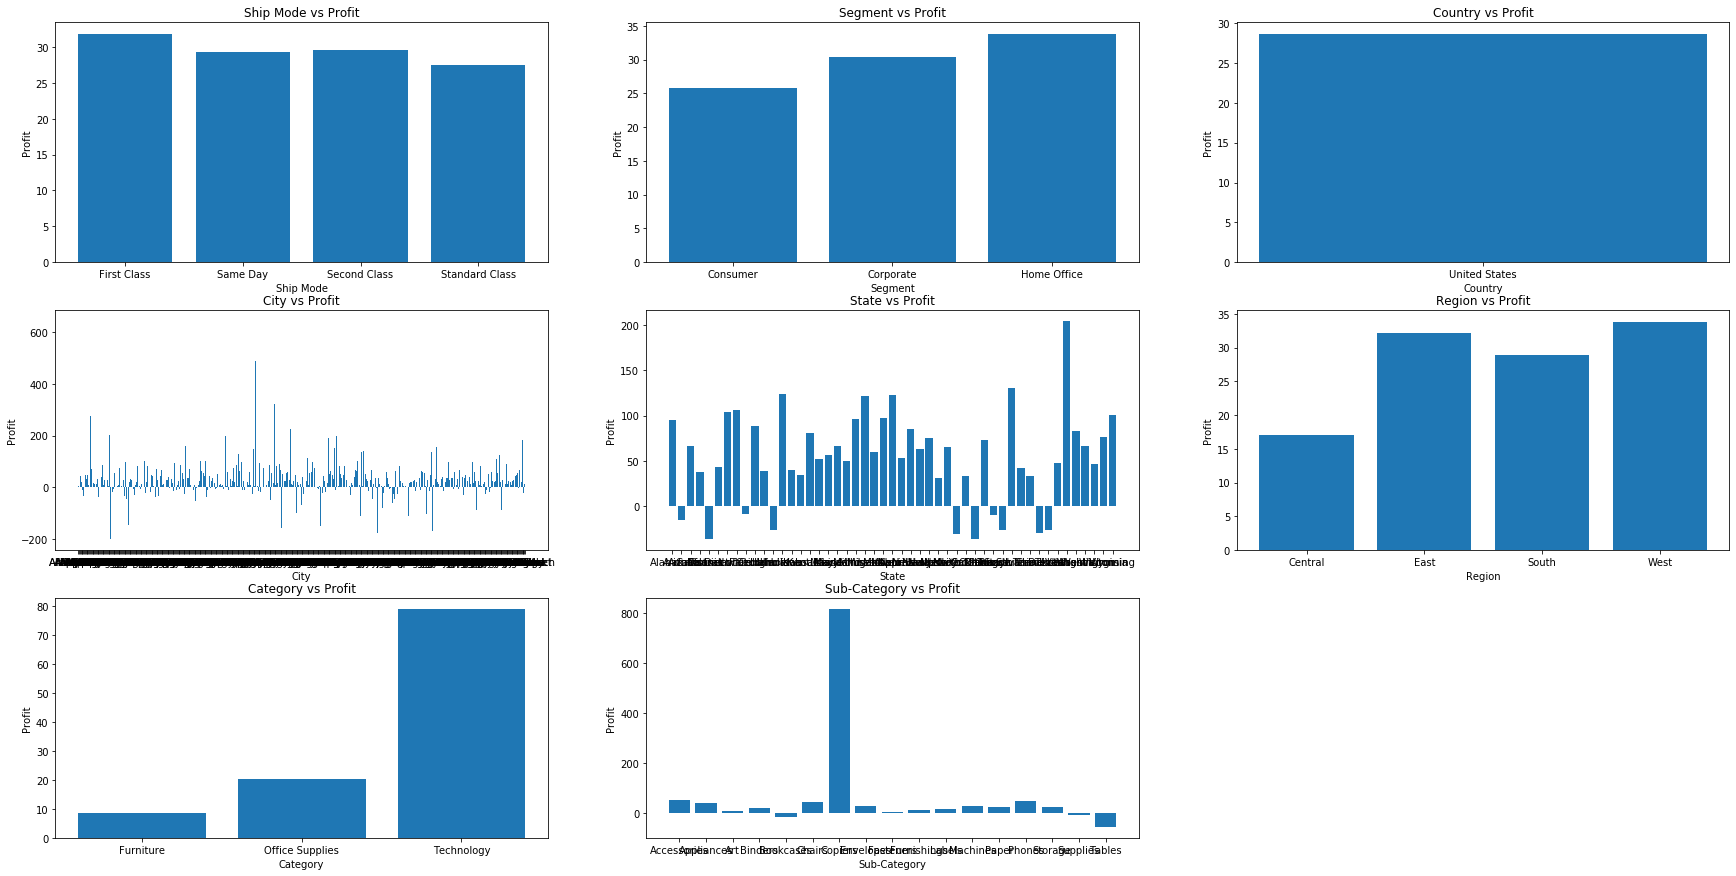

In [8]:
#visualizing each column with mean profit
plt.figure(figsize=(30,15))
plt.subplot(331)
plt.bar(queries1[0].index,queries1[0].values)
plt.xlabel(names[0])
plt.ylabel("Profit")
plt.title("Ship Mode vs Profit")
plt.subplot(332)
plt.bar(queries1[1].index,queries1[1].values)
plt.xlabel(names[1])
plt.ylabel("Profit")
plt.title("Segment vs Profit")
plt.subplot(333)
plt.bar(queries1[2].index,queries1[2].values)
plt.xlabel(names[2])
plt.ylabel("Profit")
plt.title("Country vs Profit")
plt.subplot(334)
plt.bar(queries1[3].index,queries1[3].values)
plt.xlabel(names[3])
plt.ylabel("Profit")
plt.title("City vs Profit")
plt.subplot(335)
plt.bar(queries1[4].index,queries1[4].values)
plt.xlabel(names[4])
plt.ylabel("Profit")
plt.title("State vs Profit")
plt.subplot(336)
plt.bar(queries1[5].index,queries1[5].values)
plt.xlabel(names[5])
plt.ylabel("Profit")
plt.title("Region vs Profit")
plt.subplot(337)
plt.bar(queries1[6].index,queries1[6].values)
plt.xlabel(names[6])
plt.ylabel("Profit")
plt.title("Category vs Profit")
plt.subplot(338)
plt.bar(queries1[7].index,queries1[7].values)
plt.xlabel(names[7])
plt.ylabel("Profit")
plt.title("Sub-Category vs Profit")
plt.show()

We can see that, First class shipping earns most average profit and Standard class earns least. Similarly, Home office segment earns maximum profit on average whereas Consumer segment earns least. All the data is for United States only. There are a lot of cities and few states where the company is incurring losses on average. Regionwise, Western part is earning most profit on average whereas Central part is earning least. Categorywise, Technology part is earning most profit on average whereas furniture part is earning least. In sub-categories, some are incurring losses

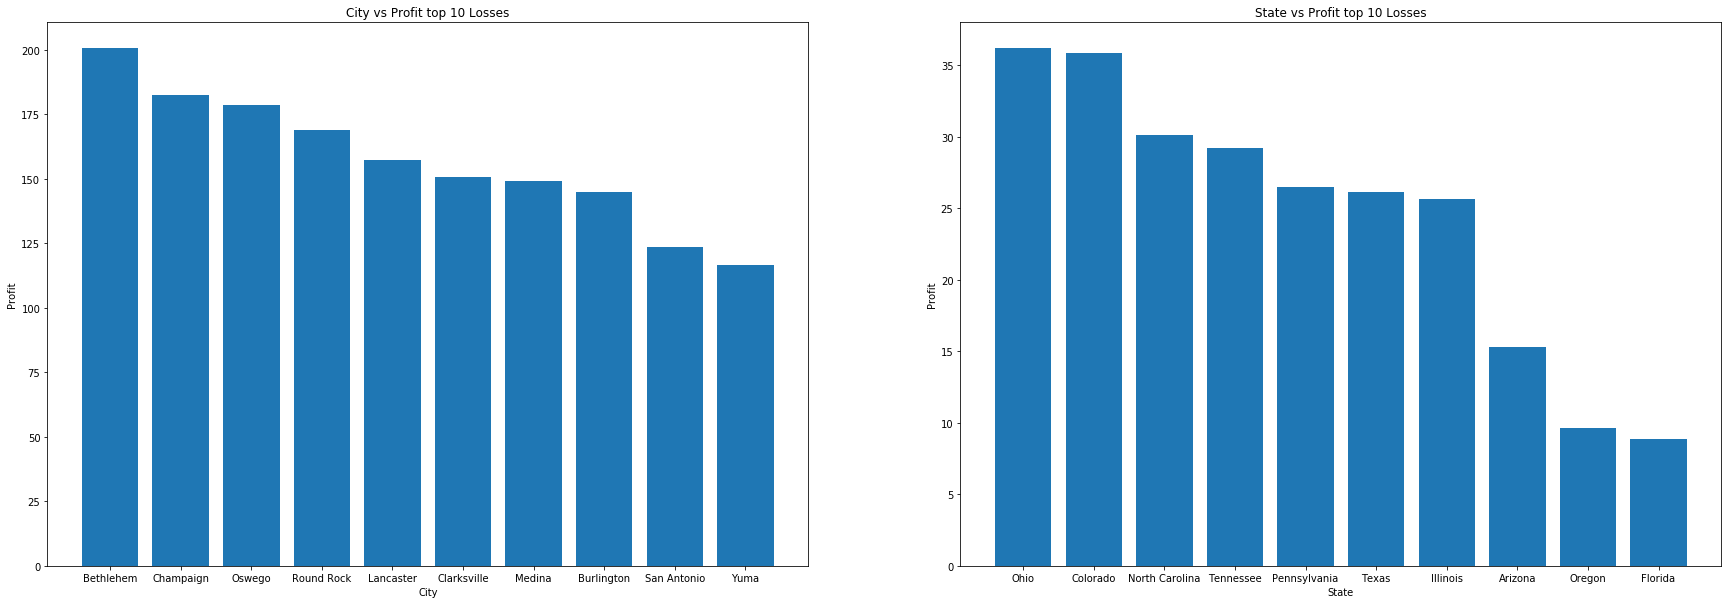

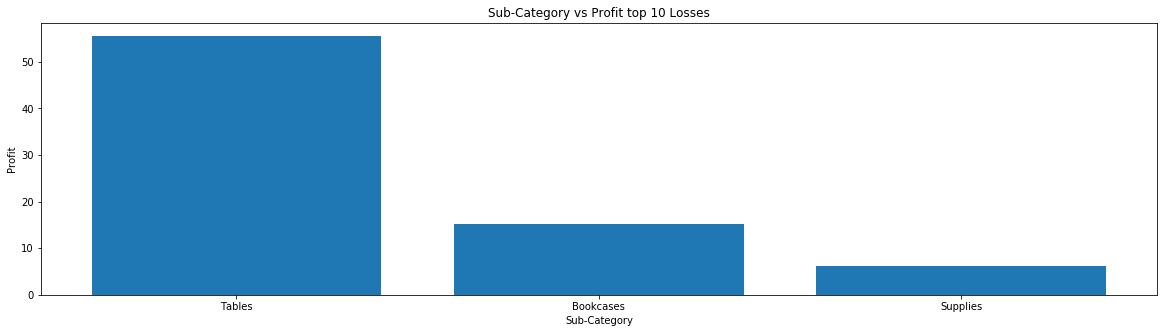

In [9]:
#extracting the data where the company is incurring losses
data_loss_city=(data.groupby("City")["Profit"].mean())
data_loss_city=data_loss_city[data_loss_city<0].sort_values()
data_loss_state=(data.groupby("State")["Profit"].mean())
data_loss_state=data_loss_state[data_loss_state<0].sort_values()
data_loss_sub_category=data.groupby("Sub-Category")["Profit"].mean()
data_loss_sub_category=data_loss_sub_category[data_loss_sub_category<0].sort_values()
plt.figure(figsize=(30,10))
plt.subplot(121)
plt.bar(data_loss_city.head(10).index,-data_loss_city.head(10).values)
plt.xlabel("City")
plt.ylabel("Profit")
plt.title("City vs Profit top 10 Losses")
plt.subplot(122)
plt.bar(data_loss_state.head(10).index,-data_loss_state.head(10).values)
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("State vs Profit top 10 Losses")
plt.figure(figsize=(20,5))
plt.subplot(111)
plt.bar(data_loss_sub_category.head(10).index,-data_loss_sub_category.head(10).values)
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.title("Sub-Category vs Profit top 10 Losses")
plt.show()

Bethlehem is incurring most losses on average. Statewise, Ohio is incurring most losses on average. Sub-categorywise, tables section is incurring most losses on average

In [20]:
#the data where loss in incurring
data_loss=data[data["Profit"]<0].sort_values(by="Profit")
print("Number of rows is: %d"%data_loss.shape[0])
data_loss.head(10)

Number of rows is: 1871


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3151,First Class,Consumer,United States,Newark,Ohio,43055,East,Technology,Machines,1799.994,2,0.7,-2639.9912
5310,First Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820
9639,Second Class,Consumer,United States,Concord,North Carolina,28027,South,Furniture,Tables,4297.644,13,0.4,-1862.3124
1199,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784


In [11]:
#grouping data according to all columns so that for each combination of values, total loss can be calculated
data_loss1=data_loss[["Ship Mode","Segment","City","Sub-Category","Profit"]]
data_loss_comb=data_loss1.groupby(["Ship Mode","Segment","City","Sub-Category"])["Profit"].sum()
print("Number of rows after grouping: %d"%data_loss_comb.shape[0])
data_loss_comb=data_loss_comb[data_loss_comb<0].sort_values()
print("Actual number of combinations of (Ship Mode, Segment, City, Sub-Category): %d"%data_loss_comb.shape[0])

Number of rows after grouping: 108324
Actual number of combinations of (Ship Mode, Segment, City, Sub-Category): 1154


In [12]:
#converting to dataframe
data_loss_comb_sample=data_loss_comb.head(20)
data_loss_comb_sample=pd.DataFrame(data_loss_comb_sample)
data_loss_comb_sample

Profit
Ship Mode      Segment     City          Sub-Category           
Standard Class Consumer    Lancaster     Machines     -6599.9780
                           Houston       Binders      -4131.0941
Same Day       Corporate   Burlington    Machines     -3839.9904
Standard Class Consumer    San Antonio   Binders      -3744.2296
               Home Office Louisville    Machines     -3399.9800
               Corporate   Chicago       Binders      -3039.6570
First Class    Consumer    Newark        Machines     -2804.9450
                           Houston       Binders      -2295.2772
Standard Class Consumer    Philadelphia  Bookcases    -1959.1182
Second Class   Consumer    Concord       Tables       -1862.3124
Standard Class Home Office Jacksonville  Machines     -1827.5044
               Corporate   New York City Tables       -1706.4201
               Consumer    San Antonio   Appliances   -1647.2214
               Home Office Chicago       Binders      -1385.4994
               Consumer    San Antonio   Machines     -1359.9920
               Home Office Burlington    Binders      -1306.5504
               Consumer    Memphis       Binders      -1239.9084
               Corporate   Philadelphia  Phones       -1226.2921
                           Dallas        Binders      -1196.9652
               Consumer    Philadelphia  Binders      -1102.0373

In [13]:
data_loss_comb_sample_index=data_loss_comb_sample.index.tolist()

In [14]:
indexes=[]
for row in data_loss_comb_sample_index:
    s="%s\n%s\n%s\n%s"%(row[0],row[1],row[2],row[3])
    indexes.append(s)

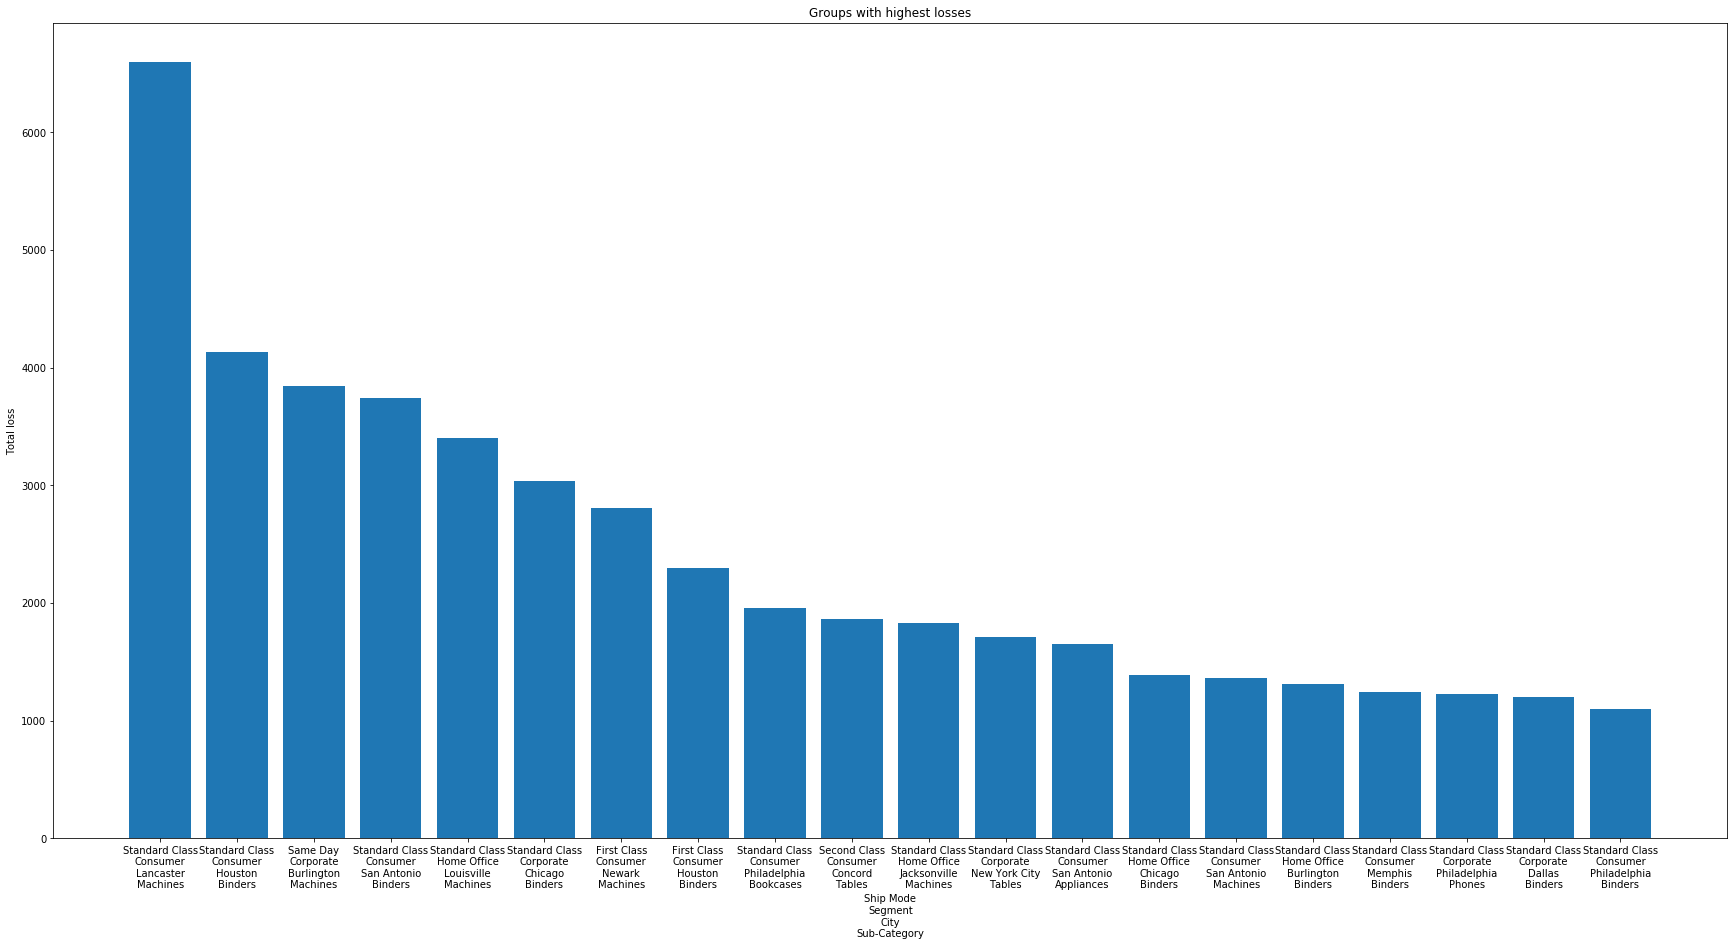

In [15]:
#vizualizing the combinations which are incurring losses
plt.figure(figsize=(30,15))
plt.bar(indexes,-data_loss_comb_sample["Profit"])
plt.xlabel("Ship Mode\nSegment\nCity\nSub-Category")
plt.ylabel("Total loss")
plt.title("Groups with highest losses")
plt.show()

(Standard class, Consumer segment, Lancaster city and Machines sub-category) this combination is incurring most losses in total. We can see that, out of top 6 total loss, in 5 of them, Standard class shipping is there. Corporate and Consumer segment is incurring more losses than Home office segment.

In [16]:
#extracting data accoring to total loss and average loss
data_loss1_ship=data_loss1[["Ship Mode","Profit"]].groupby(["Ship Mode"])["Profit"].agg(["sum","mean"])
data_loss1_segment=data_loss1[["Segment","Profit"]].groupby(["Segment"])["Profit"].agg(["sum","mean"])
data_loss1_city=data_loss1[["City","Profit"]].groupby(["City"])["Profit"].agg(["sum","mean"])
data_loss1_city_sum=data_loss1_city["sum"].sort_values().head(10)
data_loss1_city_mean=data_loss1_city["mean"].sort_values().head(10)
data_loss1_subcat=data_loss1[["Sub-Category","Profit"]].groupby(["Sub-Category"])["Profit"].agg(["sum","mean"])
data_loss1_subcat_sum=data_loss1_subcat["sum"].sort_values().head(10)
data_loss1_subcat_mean=data_loss1_subcat["mean"].sort_values().head(10)

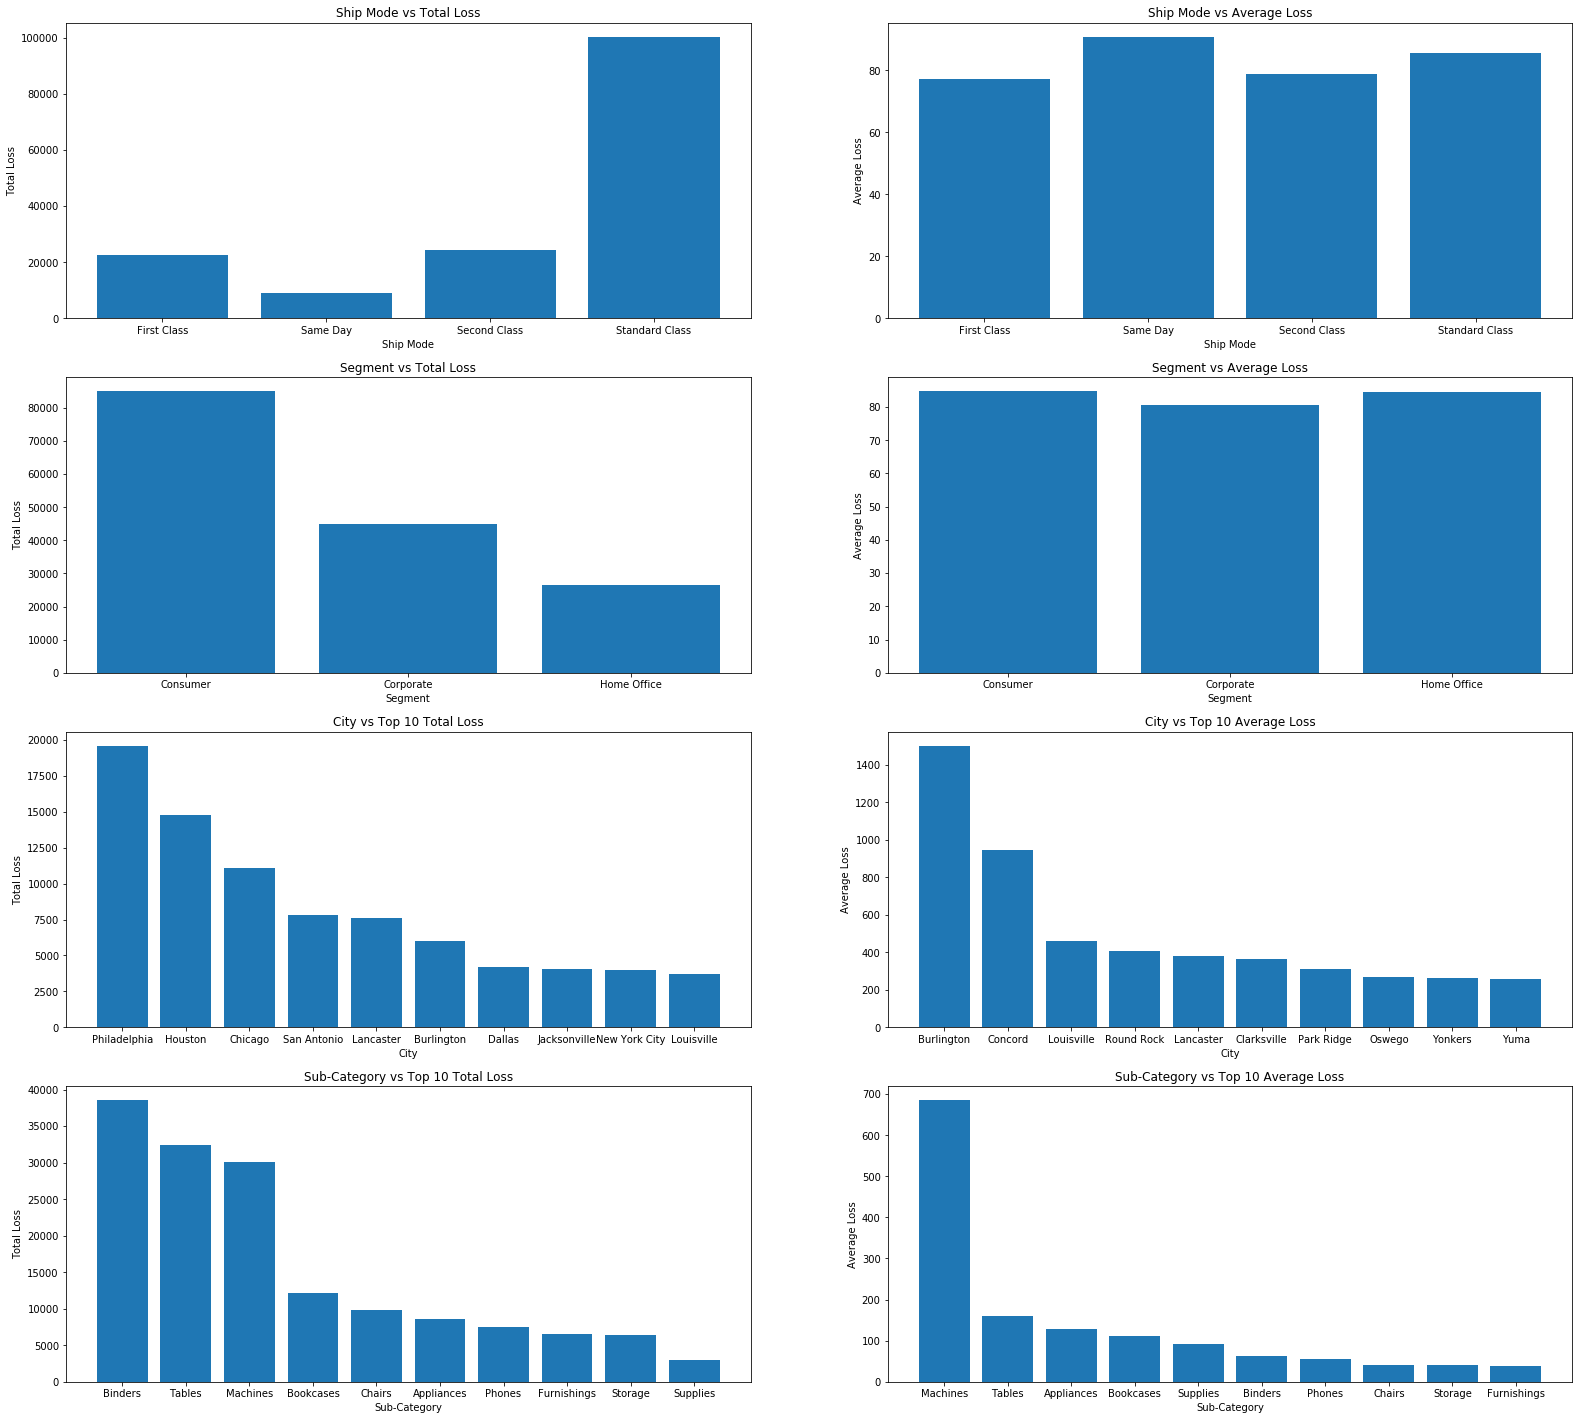

In [17]:
plt.figure(figsize=(27,25))
plt.subplot(421)
plt.bar(data_loss1_ship.index,-data_loss1_ship["sum"])
plt.xlabel("Ship Mode")
plt.ylabel("Total Loss")
plt.title("Ship Mode vs Total Loss")
plt.subplot(422)
plt.bar(data_loss1_ship.index,-data_loss1_ship["mean"])
plt.xlabel("Ship Mode")
plt.ylabel("Average Loss")
plt.title("Ship Mode vs Average Loss")
plt.subplot(423)
plt.bar(data_loss1_segment.index,-data_loss1_segment["sum"])
plt.xlabel("Segment")
plt.ylabel("Total Loss")
plt.title("Segment vs Total Loss")
plt.subplot(424)
plt.bar(data_loss1_segment.index,-data_loss1_segment["mean"])
plt.xlabel("Segment")
plt.ylabel("Average Loss")
plt.title("Segment vs Average Loss")
plt.subplot(425)
plt.bar(data_loss1_city_sum.index,-data_loss1_city_sum.values)
plt.xlabel("City")
plt.ylabel("Total Loss")
plt.title("City vs Top 10 Total Loss")
plt.subplot(426)
plt.bar(data_loss1_city_mean.index,-data_loss1_city_mean.values)
plt.xlabel("City")
plt.ylabel("Average Loss")
plt.title("City vs Top 10 Average Loss")
plt.subplot(427)
plt.bar(data_loss1_subcat_sum.index,-data_loss1_subcat_sum.values)
plt.xlabel("Sub-Category")
plt.ylabel("Total Loss")
plt.title("Sub-Category vs Top 10 Total Loss")
plt.subplot(428)
plt.bar(data_loss1_subcat_mean.index,-data_loss1_subcat_mean.values)
plt.xlabel("Sub-Category")
plt.ylabel("Average Loss")
plt.title("Sub-Category vs Top 10 Average Loss")
plt.show()

In shipping mode, standard class is incurring most loss in total of almost 1,00,000 units, and Same day mode is incurring most loss on average of above 80 units. Consumer segment is incurring highest loss in total of almost 80,000 units, whereas on average loss is almost same. Philadelphia is incurring highest loss in total of greater than 17,500 units whereas on average, Burlington is incurring highest loss. Binders sub-category is incurring highest loss in total of greater than 35,000 units, whereas on average, Machines sub-category is incurring highest loss of greater than 600 units